In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [213]:
review = pd.read_csv("tripadvisor_hotel_reviews.csv")
review

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [214]:
review.isnull().sum()

Review    0
Rating    0
dtype: int64

In [215]:
review.Rating.value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

In [216]:
order_review = review.sort_values('Rating', ascending=False, ignore_index = True)
order_review

,Review,Rating
0,"best deal new orleans hotel wonderful bargain,...",5
1,family france traveled paris husband 3 childre...,5
2,great stay jazz stayed hotel jazz 15th decembe...,5
3,quiet great location lovely hotel long weekend...,5
4,"quiet spent nights thoroughly enjoyed, hotel i...",5
...,...,...
20486,holiday inn express better holiday inn hit gym...,1
20487,not 3 star maybe 1 star say location wise good...,1
20488,look shabby large hotel absolutely no room ser...,1
20489,"secrets excellence, sorry nothing excellent re...",1


In [218]:
order_review = order_review.iloc[4500:]
order_review

,Review,Rating
4500,nadia great hotel just returned great weekend ...,5
4501,nadia hotel faultless stay engaged considerabl...,5
4502,great hotel argonaut hotel excellently decorat...,5
4503,good value good location great staff nadia gre...,5
4504,perfect place stay amsterdam great hotel just ...,5
...,...,...
20486,holiday inn express better holiday inn hit gym...,1
20487,not 3 star maybe 1 star say location wise good...,1
20488,look shabby large hotel absolutely no room ser...,1
20489,"secrets excellence, sorry nothing excellent re...",1


In [219]:
order_review[order_review['Rating']==4]

,Review,Rating
9054,excellent visit barcelona stayed hotel covadon...,4
9055,loved hoxton hoxton hotel real london got expe...,4
9056,"great price good hotel money, town childrens h...",4
9057,lovely boutique hotel hotel le walt walking di...,4
9058,awesome hotel great location brand new interco...,4
...,...,...
15088,"great, whils visiting san fran second time par...",4
15089,"funky cute, husband just going sf 1 night way ...",4
15090,"quirky nice, hotel lot going, great location r...",4
15091,great short break hotel central walking distan...,4


In [220]:
order_review.drop(order_review.index[9054:11055], inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11304\2073921276.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_review.drop(order_review.index[9054:11055], inplace=True)


In [221]:
review = order_review.sort_values('Review', ascending=False, ignore_index = True)
review

,Review,Rating
0,"zaza amazing, husband stayed zaza birthday cel...",4
1,"yuk, husband stayed hotel night horrible hotel...",1
2,"yuck, travel agent apparently did n't make dif...",1
3,"yuck, stayed recommendations tripadvisor membe...",2
4,"yuck, stayed hotel nights earlier month, staye...",2
...,...,...
13985,1 star paid 140 dollars 1 night room small no ...,1
13986,1 star best location great room left alot desi...,2
13987,1 day short stay stayed hotel convenience coac...,3
13988,"1 choice florence hotel globus fantastic, room...",5


In [231]:
review.Rating.value_counts()

5    4554
4    4500
2    1793
3    1722
1    1421
Name: Rating, dtype: int64

In [222]:
review['Expectations']=review['Rating'].map({1:'not meeting expectations',2:'not meeting expectations',3:'meeting expectations',
                                       4:'exceeds expectations',5:'exceeds expectations'})
review

,Review,Rating,Expectations
0,"zaza amazing, husband stayed zaza birthday cel...",4,exceeds expectations
1,"yuk, husband stayed hotel night horrible hotel...",1,not meeting expectations
2,"yuck, travel agent apparently did n't make dif...",1,not meeting expectations
3,"yuck, stayed recommendations tripadvisor membe...",2,not meeting expectations
4,"yuck, stayed hotel nights earlier month, staye...",2,not meeting expectations
...,...,...,...
13985,1 star paid 140 dollars 1 night room small no ...,1,not meeting expectations
13986,1 star best location great room left alot desi...,2,not meeting expectations
13987,1 day short stay stayed hotel convenience coac...,3,meeting expectations
13988,"1 choice florence hotel globus fantastic, room...",5,exceeds expectations


# Processing natural language package

In [223]:
import nltk #language
import re #regular expression
from nltk.corpus import stopwords #Eliminate some os not important word
import string

In [224]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english") #select all in english

stopword = set(stopwords.words('english'))

def clean(text):
    text = str(text).lower() #all text in lower case
    text = re.sub('\[.*?\]','',text)
    text = re.sub('https?://\S+','',text)# eliminate http
    text = re.sub('<.*?>+','',text) #eliminate punctuation
    text = re.sub('[%s]'%re.escape(string.punctuation),'',text)
    text = re.sub('\n','',text)
    text = re.sub('\w*\d\w*','',text)
    text = [word for word in text.split(' ') if word not in  stopword]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text

review["Review"] = review["Review"].apply(clean)
    

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [225]:
review

,Review,Rating,Expectations
0,zaza amaz husband stay zaza birthday celebr lo...,4,exceeds expectations
1,yuk husband stay hotel night horribl hotel flo...,1,not meeting expectations
2,yuck travel agent appar nt make room bug show...,1,not meeting expectations
3,yuck stay recommend tripadvisor member onebedr...,2,not meeting expectations
4,yuck stay hotel night earlier month stay numbe...,2,not meeting expectations
...,...,...,...
13985,star paid dollar night room small ac room g...,1,not meeting expectations
13986,star best locat great room left alot desir su...,2,not meeting expectations
13987,day short stay stay hotel conveni coach took ...,3,meeting expectations
13988,choic florenc hotel globus fantast room moder...,5,exceeds expectations


# Visualize the words with WordCloud

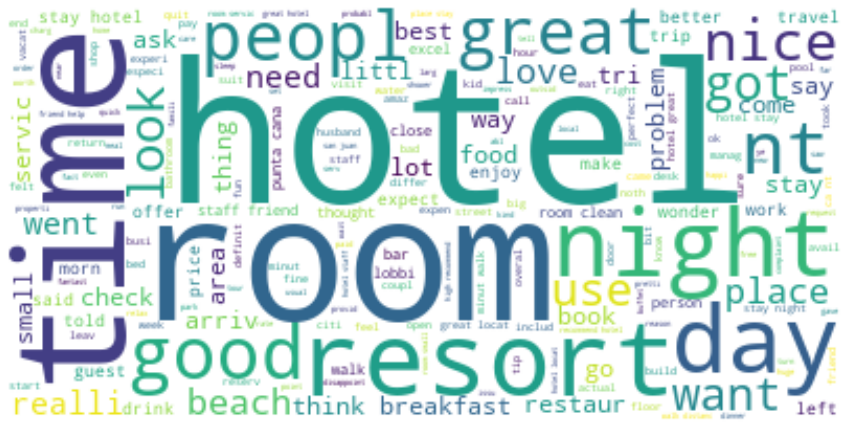

In [226]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = " ".join(i for i in review.Review)

stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Machine Learning (Split data to fit) 

In [233]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

x = np.array(review['Review'])
y = np.array(review['Rating'])

cv = CountVectorizer()
X = cv.fit_transform(x)

xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.30)



# Machine Learning (fit X,Y train)

In [234]:
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB()
model.fit(xtrain,ytrain)

BernoulliNB()

# Machine Learning (predict X,Y test)

In [237]:
# Add by the user:

user = input('Enter your review: ')
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)


Enter your review: horribl hotel
[5]
